In [ ]:
import pandas as pd

# read_csv() : csv 파일의 데이터를 불러오는 함수 
df=pd.read_csv('diabetes.csv')

# head() : 파일 객체의 상위 5개 행을 출력하는 함수 
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


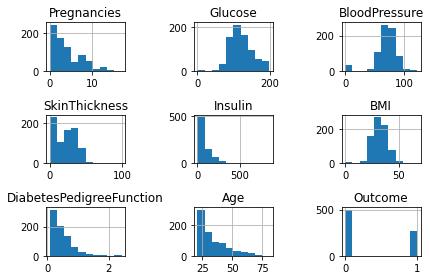

In [ ]:
from matplotlib import pyplot as plt

df.hist()
plt.tight_layout()
plt.show()

In [ ]:
for idx, col in enumerate(df.columns[:-1]):
  print(idx, col)

0 Pregnancies
1 Glucose
2 BloodPressure
3 SkinThickness
4 Insulin
5 BMI
6 DiabetesPedigreeFunction
7 Age


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

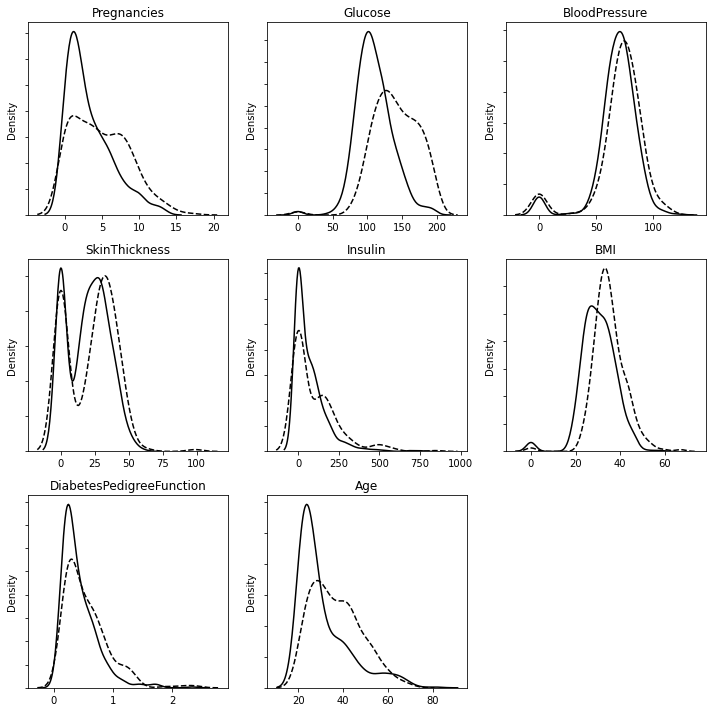

In [ ]:
 # 실선 : No Diabetes, 점선 : Diabetes
from matplotlib import pyplot as plt
import seaborn as sns

plt.subplots(3,3,figsize=(10,10))

for idx, col in enumerate(df.columns[:-1]):
  ax=plt.subplot(3,3,idx+1)
  ax.yaxis.set_ticklabels([])
  sns.distplot(df.loc[df.Outcome==0][col], hist=False, axlabel=False, 
               kde_kws={'linestyle':'-', 'color':'black', 'label':'No Diabetes'})
  sns.distplot(df.loc[df.Outcome==1][col], hist=False, axlabel=False, 
               kde_kws={'linestyle':'--', 'color':'black', 'label':'Diabetes'})
  ax.set_title(col)

plt.subplot(3,3,9).set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
print(df.isnull().any())

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


In [ ]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
print(df.describe())

       Pregnancies     Glucose  ...         Age     Outcome
count   768.000000  768.000000  ...  768.000000  768.000000
mean      3.845052  120.894531  ...   33.240885    0.348958
std       3.369578   31.972618  ...   11.760232    0.476951
min       0.000000    0.000000  ...   21.000000    0.000000
25%       1.000000   99.000000  ...   24.000000    0.000000
50%       3.000000  117.000000  ...   29.000000    0.000000
75%       6.000000  140.250000  ...   41.000000    1.000000
max      17.000000  199.000000  ...   81.000000    1.000000

[8 rows x 9 columns]


In [ ]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
print(df.loc[df['Glucose']==0].shape)

(5, 9)


In [ ]:
print('Number of rows with 0 values for each variable')
for col in df.columns:
  missing_rows=df.loc[df[col]==0].shape[0]
  print(col+":"+str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies:111
Glucose:5
BloodPressure:35
SkinThickness:227
Insulin:374
BMI:11
DiabetesPedigreeFunction:0
Age:0
Outcome:500


In [ ]:
import numpy as np

df['Glucose']=df['Glucose'].replace(0, np.nan)
df['BloodPressure']=df['BloodPressure'].replace(0, np.nan)
df['SkinThickness']=df['SkinThickness'].replace(0, np.nan)
df['Insulin']=df['Insulin'].replace(0, np.nan)
df['BMI']=df['BMI'].replace(0, np.nan)

In [ ]:
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [ ]:
print('Number of rows with 0 values for each variable')
for col in df.columns:
  missing_rows=df.loc[df[col]==0].shape[0]
  print(col+":"+str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies:111
Glucose:0
BloodPressure:0
SkinThickness:0
Insulin:0
BMI:0
DiabetesPedigreeFunction:0
Age:0
Outcome:500


In [ ]:
df['Glucose']=df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].fillna(df['Insulin'].mean())
df['BMI']=df['BMI'].fillna(df['BMI'].mean())

In [ ]:
from sklearn import preprocessing
df_scaled=preprocessing.scale(df)
print(type(df_scaled))

df_scaled=pd.DataFrame(df_scaled, columns=df.columns)
df_scaled['Outcome']=df['Outcome']
df=df_scaled
print(df.describe().loc[['mean', 'std', 'max'],].round(2).abs())

<class 'numpy.ndarray'>
      Pregnancies  Glucose  ...   Age  Outcome
mean         0.00     0.00  ...  0.00     0.35
std          1.00     1.00  ...  1.00     0.48
max          3.91     2.54  ...  4.06     1.00

[3 rows x 9 columns]


In [ ]:
from sklearn.model_selection import train_test_split

x=df.loc[:,df.columns!='Outcome']
y=df.loc[:, 'Outcome']

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2)
x_train, x_val, y_train, y_val=train_test_split(x_train, y_train, test_size=0.2)

In [1]:
from keras.models import Sequential
from keras.layers import Dense

model=Sequential()
model.add(Dense(32, activation='relu', input_dim=8))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=200)

Epoch 1/200
16/16 [==============================] - 1s 2ms/step - loss: 37.0239 - accuracy: 0.3686
Epoch 2/200
16/16 [==============================] - 0s 1ms/step - loss: 17.5131 - accuracy: 0.3849
Epoch 3/200
16/16 [==============================] - 0s 2ms/step - loss: 3.0023 - accuracy: 0.5927
Epoch 4/200
16/16 [==============================] - 0s 1ms/step - loss: 1.5503 - accuracy: 0.5866
Epoch 5/200
16/16 [==============================] - 0s 1ms/step - loss: 1.1509 - accuracy: 0.6619
Epoch 6/200
16/16 [==============================] - 0s 1ms/step - loss: 1.0453 - accuracy: 0.6721
Epoch 7/200
16/16 [==============================] - 0s 1ms/step - loss: 0.8966 - accuracy: 0.6497
Epoch 8/200
16/16 [==============================] - 0s 1ms/step - loss: 0.8883 - accuracy: 0.6578
Epoch 9/200
16/16 [==============================] - 0s 2ms/step - loss: 0.8497 - accuracy: 0.6578
Epoch 10/200
16/16 [==============================] - 0s 1ms/step - loss: 0.8124 - accuracy: 0.6640
Epoch 1

In [ ]:
scores=model.evaluate(x_train, y_train)
print('Training accuracy : %.2f%%\n'%(scores[1]*100))

scores=model.evaluate(x_test, y_test)
print('Training accuracy : %.2f%%\n'%(scores[1]*100))

16/16 [==============================] - 1s 4ms/step - loss: 0.1857 - accuracy: 0.9348
Training accuracy : 93.48%

5/5 [==============================] - 0s 4ms/step - loss: 0.6353 - accuracy: 0.7727
Training accuracy : 77.27%



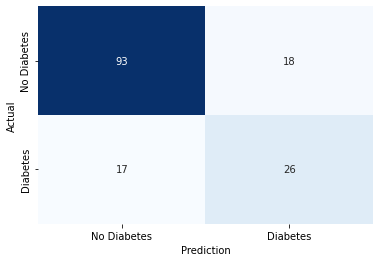

<Figure size 432x288 with 0 Axes>

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_test_pred = (model.predict(x_test) > 0.5).astype("int32")

c_matrix = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot=True, xticklabels=['No Diabetes','Diabetes'],
             yticklabels=['No Diabetes','Diabetes'], cbar=False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

plt.show()
plt.clf()

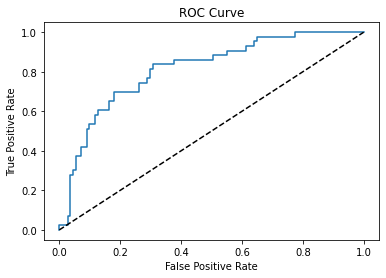

<Figure size 432x288 with 0 Axes>

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_test_pred_probs = model.predict(x_test)
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)

plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') # 대각선
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.clf()